In [1]:
import numpy as np
import pandas as pd
import os as os

In [2]:
os.chdir('../')

In [3]:
%pylab inline
exec(open("./run_model.py").read())
exec(open("./get_signal_names.py").read())
exec(open("./portfolio_optimizer.py").read())

import datetime
from pylab import rcParams


Populating the interactive namespace from numpy and matplotlib


In [4]:
#sig_dir = '/Users/raghuramkowdeed/Desktop/afp_data/1000/ranked_rps_data/'
#fac_data_dir='/Users/raghuramkowdeed/Desktop/afp_data/1000/factor_exposure_data/'
#fac_ret_file = '/Users/raghuramkowdeed/Desktop/afp_data/1000/fac_ret_file.csv'

use_rank = True

sig_dir = '../afp_data/rank/0_3000/rps_data/'
fac_data_dir='../afp_data/rank/0_3000/factor_exposure_data/'
fac_ret_file = '../afp_data/rank/0_3000/fac_ret_file.csv'

if not use_rank:
    sig_dir = '../afp_data/norm/0_3000//rps_data/'
    fac_data_dir='../afp_data/norm/0_3000/factor_exposure_data/'
    fac_ret_file = '../afp_data/norm/0_3000/fac_ret_file.csv'
    

In [5]:
sig_df = pd.DataFrame()
sig_files = os.listdir(sig_dir)
sig_files = np.sort(sig_files)



for sig_file in sig_files :
    if '.csv' not in sig_file :
        continue
    print(sig_file)
    this_file = sig_dir + sig_file
    this_df = pd.read_csv(this_file, index_col = 'date')
    this_df.index = [ datetime.datetime.strptime(val, '%Y-%m-%d') for val in this_df.index]
    #this_df = this_df.sort_values(['mve'], ascending=False)
    #this_df = this_df.iloc[start_stock_ind:end_stock_ind,:]
    sig_df = sig_df.append(this_df)
data = sig_df.copy()

1980-01-31.csv
1980-02-29.csv
1980-03-31.csv
1980-04-30.csv
1980-05-30.csv
1980-06-30.csv
1980-07-31.csv
1980-08-29.csv
1980-09-30.csv
1980-10-31.csv
1980-11-28.csv
1980-12-31.csv
1981-01-30.csv
1981-02-27.csv
1981-03-31.csv
1981-04-30.csv
1981-05-29.csv
1981-06-30.csv
1981-07-31.csv
1981-08-31.csv
1981-09-30.csv
1981-10-30.csv
1981-11-30.csv
1981-12-31.csv
1982-01-29.csv
1982-02-26.csv
1982-03-31.csv
1982-04-30.csv
1982-05-28.csv
1982-06-30.csv
1982-07-30.csv
1982-08-31.csv
1982-09-30.csv
1982-10-29.csv
1982-11-30.csv
1982-12-31.csv
1983-01-31.csv
1983-02-28.csv
1983-03-31.csv
1983-04-29.csv
1983-05-31.csv
1983-06-30.csv
1983-07-29.csv
1983-08-31.csv
1983-09-30.csv
1983-10-31.csv
1983-11-30.csv
1983-12-30.csv
1984-01-31.csv
1984-02-29.csv
1984-03-30.csv
1984-04-30.csv
1984-05-31.csv
1984-06-29.csv
1984-07-31.csv
1984-08-31.csv
1984-09-28.csv
1984-10-31.csv
1984-11-30.csv
1984-12-31.csv
1985-01-31.csv
1985-02-28.csv
1985-03-29.csv
1985-04-30.csv
1985-05-31.csv
1985-06-28.csv
1985-07-31

In [6]:


#model_name = 'pls_regression'
#train_model_arg = { 'n_components':20, 'scale':True, 'max_iter':5000, 'tol':1e-08, 'copy':True }



In [6]:
begin_date = datetime.datetime.strptime('19900101', '%Y%m%d')
end_date = datetime.datetime.strptime('20170101', '%Y%m%d')

sig_df = sig_df[(sig_df.index>=begin_date) & (sig_df.index<end_date)]
sig_df = sig_df.fillna(sig_df.mean())

In [8]:
'res_ret' in sig_df.columns

True

In [7]:
#factor_names =  ['beta','mve', 'bm', 'roic', 'agr', 'mom12m', 'idiovol']
factor_names =  ['beta']
sig_names = get_signal_names()
ret_sr = sig_df['ret']
sig_df = sig_df[sig_names]
sig_df = sig_df.drop(factor_names, axis=1)
sig_df = sig_df.drop(['idiovol'], axis=1)
ff_sig_df = sig_df[[ 'mve', 'bm', 'roic', 'agr', 'mom12m',]]

In [8]:
pm = PortfolioOptimizer(fac_data_dir=fac_data_dir,
                        fac_ret_file = fac_ret_file,
                        fac_cov_hl = 12.0,
                        fac_names = None
                       )

--------


1991-01-31 00:00:00
(36000, 5)
(36000,)
1991-02-28 00:00:00
(36000, 5)
(36000,)
1991-03-28 00:00:00
(36000, 5)
(36000,)
1991-04-30 00:00:00
(36000, 5)
(36000,)
1991-05-31 00:00:00
(36000, 5)
(36000,)
1991-06-28 00:00:00
(36000, 5)
(36000,)
1991-07-31 00:00:00
(36000, 5)
(36000,)
1991-08-30 00:00:00
(36000, 5)
(36000,)
1991-09-30 00:00:00
(36000, 5)
(36000,)
1991-10-31 00:00:00
(36000, 5)
(36000,)
1991-11-29 00:00:00
(36000, 5)
(36000,)
1991-12-31 00:00:00
(36000, 5)
(36000,)
1992-01-31 00:00:00
(36000, 5)
(36000,)
1992-02-28 00:00:00
(36000, 5)
(36000,)
1992-03-31 00:00:00
(36000, 5)
(36000,)
1992-04-30 00:00:00
(36000, 5)
(36000,)
1992-05-29 00:00:00
(36000, 5)
(36000,)
1992-06-30 00:00:00
(36000, 5)
(36000,)
1992-07-31 00:00:00
(36000, 5)
(36000,)
1992-08-31 00:00:00
(36000, 5)
(36000,)
1992-09-30 00:00:00
(36000, 5)
(36000,)
1992-10-30 00:00:00
(36000, 5)
(36000,)
1992-11-30 00:00:00
(36000, 5)
(36000,)
1992-12-31 00:00:00
(36000, 5)
(36000,)
1993-01-29 00:00:00
(36000, 5)
(36000,)


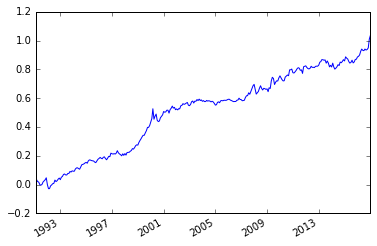

In [9]:
model_name = 'linear_regression'
train_model_arg = { 'fit_intercept':True }
look_back = 12

ff_lm_sig_sr, ff_model_vec = run_model( ff_sig_df, ret_sr, model_name, train_model_arg=train_model_arg, 
                          pred_model_arg ={},look_back=look_back, sample_decay = 1.0)
ff_lm_pnl_sr = pm.run_signal(ff_lm_sig_sr, neu_sig=True)
ff_lm_pnl_sr.cumsum().plot()
print( ff_lm_pnl_sr.mean()*sqrt(12)/ff_lm_pnl_sr.std() )

In [13]:
len(ff_model_vec)

312

In [14]:
ff_lm_sig_sr.index.unique().shape

(312,)

In [ ]:
model_name = 'linear_regression'
train_model_arg = { 'fit_intercept':True }
look_back = 12

all_lm_sig_sr, all_model_vec = run_model( sig_df, ret_sr, model_name, train_model_arg=train_model_arg, 
                          pred_model_arg ={},look_back=look_back, sample_decay = 1.0)
all_lm_pnl_sr = pm.run_signal(all_lm_sig_sr, neu_sig=True)
all_lm_pnl_sr.cumsum().plot()
print( all_lm_pnl_sr.mean()*sqrt(12)/all_lm_pnl_sr.std() )

1991-01-31 00:00:00
(36000, 99)
(36000,)
1991-02-28 00:00:00
(36000, 99)
(36000,)
1991-03-28 00:00:00
(36000, 99)
(36000,)
1991-04-30 00:00:00
(36000, 99)
(36000,)
1991-05-31 00:00:00
(36000, 99)
(36000,)
1991-06-28 00:00:00
(36000, 99)
(36000,)
1991-07-31 00:00:00
(36000, 99)
(36000,)
1991-08-30 00:00:00
(36000, 99)
(36000,)
1991-09-30 00:00:00
(36000, 99)
(36000,)
1991-10-31 00:00:00
(36000, 99)
(36000,)
1991-11-29 00:00:00
(36000, 99)
(36000,)
1991-12-31 00:00:00
(36000, 99)
(36000,)
1992-01-31 00:00:00
(36000, 99)
(36000,)
1992-02-28 00:00:00
(36000, 99)
(36000,)
1992-03-31 00:00:00
(36000, 99)
(36000,)
1992-04-30 00:00:00
(36000, 99)
(36000,)
1992-05-29 00:00:00
(36000, 99)
(36000,)
1992-06-30 00:00:00
(36000, 99)
(36000,)
1992-07-31 00:00:00
(36000, 99)
(36000,)
1992-08-31 00:00:00
(36000, 99)
(36000,)
1992-09-30 00:00:00
(36000, 99)
(36000,)
1992-10-30 00:00:00
(36000, 99)
(36000,)


In [ ]:
d1 = datetime.datetime.strptime('20070101', '%Y%m%d')
d2 = datetime.datetime.strptime('20170101', '%Y%m%d')
df = pd.DataFrame()
df['ff'] = ff_lm_pnl_sr[ (ff_lm_pnl_sr.index>=d1) & ( ff_lm_pnl_sr.index<=d2) ]
df['all'] = all_lm_pnl_sr[ (all_lm_pnl_sr.index>=d1) & ( all_lm_pnl_sr.index<=d2) ]
print( df.mean()*sqrt(12)/df.std() )
df.cumsum().plot()

In [ ]:
d1 = datetime.datetime.strptime('19900101', '%Y%m%d')
d2 = datetime.datetime.strptime('20070101', '%Y%m%d')
df = pd.DataFrame()
df['ff'] = ff_lm_pnl_sr[ (ff_lm_pnl_sr.index>=d1) & ( ff_lm_pnl_sr.index<=d2) ]
df['all'] = all_lm_pnl_sr[ (all_lm_pnl_sr.index>=d1) & ( all_lm_pnl_sr.index<=d2) ]
print( df.mean()*sqrt(12)/df.std() )
df.cumsum().plot()

In [ ]:
d1 = datetime.datetime.strptime('19900101', '%Y%m%d')
d2 = datetime.datetime.strptime('20170101', '%Y%m%d')
df = pd.DataFrame()
df['ff'] = ff_lm_pnl_sr[ (ff_lm_pnl_sr.index>=d1) & ( ff_lm_pnl_sr.index<=d2) ]
df['all'] = all_lm_pnl_sr[ (all_lm_pnl_sr.index>=d1) & ( all_lm_pnl_sr.index<=d2) ]
print( df.mean()*sqrt(12)/df.std() )
df.cumsum().plot()

1990-02-28 00:00:00
(3000, 5)
(3000,)
1990-03-30 00:00:00
(3000, 5)
(3000,)
1990-04-30 00:00:00
(3000, 5)
(3000,)
1990-05-31 00:00:00
(3000, 5)
(3000,)
1990-06-29 00:00:00
(3000, 5)
(3000,)
1990-07-31 00:00:00
(3000, 5)
(3000,)
1990-08-31 00:00:00
(3000, 5)
(3000,)
1990-09-28 00:00:00
(3000, 5)
(3000,)
1990-10-31 00:00:00
(3000, 5)
(3000,)
1990-11-30 00:00:00
(3000, 5)
(3000,)
1990-12-31 00:00:00
(3000, 5)
(3000,)
1991-01-31 00:00:00
(3000, 5)
(3000,)
1991-02-28 00:00:00
(3000, 5)
(3000,)
1991-03-28 00:00:00
(3000, 5)
(3000,)
1991-04-30 00:00:00
(3000, 5)
(3000,)
1991-05-31 00:00:00
(3000, 5)
(3000,)
1991-06-28 00:00:00
(3000, 5)
(3000,)
1991-07-31 00:00:00
(3000, 5)
(3000,)
1991-08-30 00:00:00
(3000, 5)
(3000,)
1991-09-30 00:00:00
(3000, 5)
(3000,)
1991-10-31 00:00:00
(3000, 5)
(3000,)
1991-11-29 00:00:00
(3000, 5)
(3000,)
1991-12-31 00:00:00
(3000, 5)
(3000,)
1992-01-31 00:00:00
(3000, 5)
(3000,)
1992-02-28 00:00:00
(3000, 5)
(3000,)
1992-03-31 00:00:00
(3000, 5)
(3000,)
1992-04-30 0

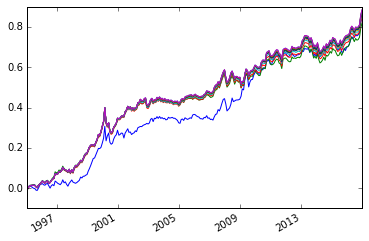

In [17]:
model_name = 'linear_regression'
train_model_arg = { 'fit_intercept':True }
look_back_vec = np.arange(1, 37, 6)
decay_vec =np.arange(0.05, 1.1, 0.2)


ff_pnl_df = np.zeros((look_back_vec.shape[0], decay_vec.shape[0]))


for i, look_back in enumerate(look_back_vec) :
    for j, sample_decay in enumerate(decay_vec):
        
        ff_lm_sig_sr, ff_model_vec = run_model( ff_sig_df, ret_sr, model_name, train_model_arg=train_model_arg, 
                              pred_model_arg ={},look_back=look_back, sample_decay = sample_decay)
        ff_lm_pnl_sr = pm.run_signal(ff_lm_sig_sr, neu_sig=True)

        d1 = datetime.datetime.strptime('19950101', '%Y%m%d')
        d2 = datetime.datetime.strptime('20170101', '%Y%m%d')
        ff_lm_pnl_sr = ff_lm_pnl_sr[ (ff_lm_pnl_sr.index>=d1) & ( ff_lm_pnl_sr.index<=d2) ]
        ff_lm_pnl_sr.cumsum().plot()
        print(look_back, sample_decay)
        print( ff_lm_pnl_sr.mean()*sqrt(12)/ff_lm_pnl_sr.std() )
        print('-------')
        ff_pnl_df[i,j] = ff_lm_pnl_sr.mean()*sqrt(12)/ff_lm_pnl_sr.std()

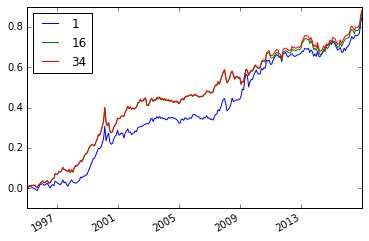

In [18]:
ff_pnl_df.iloc[:,[0,5,11]].cumsum().plot()

In [19]:
print( ff_pnl_df.mean()*sqrt(12)/ff_pnl_df.std() )

1     0.761057
4     0.740203
7     0.771183
10    0.783567
13    0.791159
16    0.792250
19    0.797038
22    0.797833
25    0.800442
28    0.805493
31    0.807597
34    0.808475
dtype: float64


In [24]:
np.arange(0.05, 1.1, 0.2)

array([ 0.05,  0.25,  0.45,  0.65,  0.85,  1.05])

In [25]:
range(1,37,3)

range(1, 37, 3)

In [28]:
np.arange(1, 37, 6)

array([ 1,  7, 13, 19, 25, 31])